In [ ]:
# 测试0-1000 的分布效果

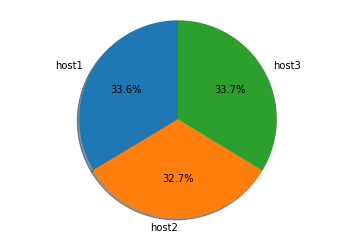

In [6]:
%run demo_jump.py